In [2]:
import numpy as np
import pandas as pd # for loading data

In [3]:
cd ..

/home/nicktehrany/Documents/Uni/3rd Year/P4/Machine Learning/Project


In [4]:
# Importing our own Functions
from util.helperfunctions import one_hot, one_hot_genres, clean_text, one_hot_reverse

/home/nicktehrany/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nicktehrany/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nicktehrany/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nicktehrany/.local/lib/python3.6/site-packages/tensorflow/python/frame

In [5]:
cd src

/home/nicktehrany/Documents/Uni/3rd Year/P4/Machine Learning/Project/src


In [6]:
train_df = pd.read_csv("train.csv")

## Cleaning the test set lyrics and creating One-Hots for train data's genres and just cleaned lyrics

In [7]:
lyrics, word_list = clean_text(train_df['Lyrics'], 1)

# writing cleaned text back to df
index = 0
for text in lyrics:
    train_df['Lyrics'][index] = text
    index+=1
del lyrics

In [8]:
train_genres = one_hot_genres(train_df['Genre'])

## Replace all the lyrics with their respctive vector of word occurrences to be used as the input layer for the neural network

In [9]:
train_lyrics = np.zeros(shape=(len(train_df),len(word_list)))
for index, value in train_df.iterrows():
    train_lyrics[index] = one_hot(str(train_df['Lyrics'][index]), word_list, len(word_list), 0)
print(train_lyrics.shape)
lyrics_size = len(word_list)

# Cleaning no more used variables
del train_df

(12240, 37818)


## Cleaning the test set lyrics and creating One-Hots for test data's genres and just cleaned lyrics

In [10]:
test_df = pd.read_csv("test.csv")
lyrics, dummy_list = clean_text(test_df['Lyrics'], 0)

# writing cleaned text back to df
index = 0
for text in lyrics:
    test_df['Lyrics'][index] = text
    index+=1
del lyrics

In [11]:
test_genres = one_hot_genres(test_df['Genre'])

In [12]:
test_lyrics = np.zeros(shape=(len(test_df), lyrics_size))
for index, value in test_df.iterrows():
    test_lyrics[index] = one_hot(str(test_df['Lyrics'][index]), word_list, lyrics_size, 0)
print(test_lyrics.shape)

# Cleaning no more used variables
del test_df

(2160, 37818)


# Neural Network stuff 
## **Modify and run only the cells below to change the neural network**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(units=256, input_shape=(lyrics_size,)))
model.add(Activation('relu'))            # activation layer
model.add(Dropout(0.8))
model.add(Dense(256))
model.add(Dense(8))
model.add(Activation('softmax'))         # output class probabilities

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               9681664   
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 2056      
_________________________________________________________________
activation_17 (Activation)   (None, 8)                 0         
Total params: 9,749,512
Trainable params: 9,749,512
Non-trainable params: 0
____________________________________________

In [54]:
from tensorflow.keras.optimizers import SGD, Adam

optimizer = Adam(lr=0.0001) # lr is the learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_lyrics, train_genres, epochs=10, validation_split=17/100, batch_size=16);

Train on 10159 samples, validate on 2081 samples
Epoch 1/10
10159/10159 [==============================] - 17s 2ms/sample - loss: 1.8456 - acc: 0.3056 - val_loss: 1.6159 - val_acc: 0.4310
Epoch 2/10
10159/10159 [==============================] - 17s 2ms/sample - loss: 1.4788 - acc: 0.4718 - val_loss: 1.4255 - val_acc: 0.4926
Epoch 3/10
10159/10159 [==============================] - 17s 2ms/sample - loss: 1.2593 - acc: 0.5555 - val_loss: 1.3471 - val_acc: 0.5214
Epoch 4/10
 8528/10159 [========================>.....] - ETA: 2s - loss: 1.0957 - acc: 0.6207

## Testing the Neural Network's performace + Confusion Matrix

In [ ]:
results = model.evaluate(test_lyrics, test_genres, batch_size=16)

In [51]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict_classes(test_lyrics)
cm=confusion_matrix(one_hot_reverse(test_genres),y_pred)
print(cm)

[[114  34  11  25  35  29  22  22]
 [ 39  97   0  28  10  47  30  26]
 [  9   1 216   1  25   2   8   0]
 [ 15  11   0 188  12   5  16  40]
 [ 26  10  24  14 132   7  16   8]
 [  7  35   2   8   6 150  31  22]
 [ 21  16  22  14  38  20 111  21]
 [ 23  28   0  35   8  18  25 144]]


                   Pop  Rock  Hip-Hop/Rap  Country  R&B/Soul  Metal  \
Pop                114    34           11       25        35     29   
Rock                39    97            0       28        10     47   
Hip-Hop/Rap          9     1          216        1        25      2   
Country             15    11            0      188        12      5   
R&B/Soul            26    10           24       14       132      7   
Metal                7    35            2        8         6    150   
Alternative/Indie   21    16           22       14        38     20   
Folk                23    28            0       35         8     18   

                   Alternative/Indie  Folk  
Pop                               22    22  
Rock                              30    26  
Hip-Hop/Rap                        8     0  
Country                           16    40  
R&B/Soul                          16     8  
Metal                             31    22  
Alternative/Indie                111    21  


(8.0, 0.0)

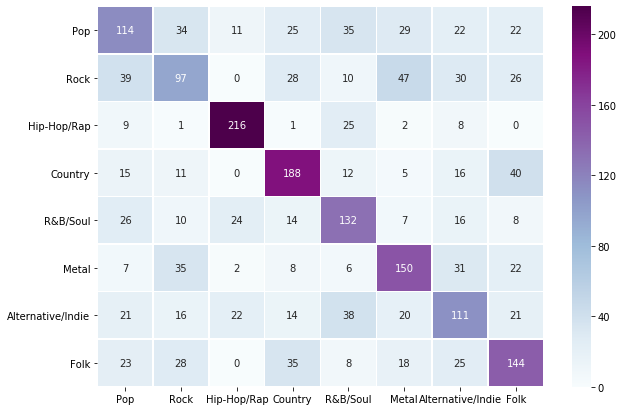

In [52]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

genre_list = ['Pop','Rock', 'Hip-Hop/Rap', 'Country', 'R&B/Soul', 'Metal', 'Alternative/Indie', 'Folk']

df_cm = pd.DataFrame(cm, index = genre_list, columns = genre_list)
print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidth=0.5, fmt='g', cmap="BuPu")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values